(sec-sintesi-distr-post)=
# Sintesi a posteriori

La distribuzione a posteriori descrive il nostro grado di incertezza rispetto al parametro incognito (o rispetto ai parametri incogniti) oggetto dell'inferenza. La distribuzione a posteriori contiene tutte le informazioni disponibili sui possibili valori del parametro. Se il parametro esaminato è monodimensionale (o bidimensionale) è possibile fornire un grafico di tutta la distribuzione a posteriori $p(\theta \mid y)$. Tuttavia, spesso vogliamo anche giungere ad una sintesi numerica della distribuzione a posteriori, soprattutto se il vettore dei parametri ha più di due dimensioni. A questo fine possono essere utilizzate le consuete statistiche descrittive, come media, mediana, moda, varianza, deviazione standard e i quantili. In alcuni casi, queste statistiche descrittive sono più facili da presentare e interpretare rispetto alla rappresentazione grafica della distribuzione a posteriori.

La stima puntuale della tendenza centrale della distribuzione a posteriori fornisce informazioni su quello che può essere considerato come il "valore più credibile" del parametro. L'intervallo di credibilità fornisce invece un'indicazione dell'ampiezza dell'intervallo che contiene una determinata quota della massa della distribuzione a posteriori del parametro.

## Stima puntuale

Per sintetizzare la distribuzione a posteriori in modo da giungere ad una stima puntuale di $\theta$ si è soliti scegliere tra moda, mediana o media a seconda del tipo di distribuzione con cui si ha a che fare e della sua forma. A moda, mediana e media a posteriori possiamo attribuire interpretazioni diverse.

-   La media è il valore atteso a posteriori del parametro.
-   La moda può essere interpretata come il singolo valore più credibile del parametro, alla luce dei dati, ovvero il valore che massimizza la distribuzione a posteriori del parametro $\theta$. Per questa ragione la moda viene detta *massimo a posteriori*, MAP. Il limite della moda quale statistica riassuntiva della distribuzione a posteriori è che, talvolta, la distribuzione a posteriori è multimodale e il MAP non è necessariamente il valore "più credibile".
-   La mediana è il valore del parametro tale per cui, su entrambi i lati di essa, giace il 50% della massa di probabilità a posteriori.

La misura di variabilità del parametro è la *varianza a posteriori* la quale, nel caso di una distribuzione a posteriori ottenuta per via numerica, si calcola con la formula della varianza che conosciamo rispetto alla tendenza centrale data dalla media a posteriori. La radice quadrata della varianza a posteriori è la *deviazione standard a posteriori* che descrive l'incertezza a posteriori circa il parametro di interesse nella stessa unità di misura dei dati.

Le procedure bayesiane basate sui metodi MCMC utilizzano un numero finito di campioni dalla distribuzione stazionaria, e una tale caratteristica della simulazione introduce un ulteriore livello di incertezza nella stima del parametro. L'*errore standard della stima* (in inglese *Monte Carlo standard error*, MCSE) misura l'accuratezza della simulazione. La deviazione standard a posteriori e l'errore standard della stima sono due concetti completamente diversi. La deviazione standard a posteriori descrive l'incertezza circa il parametro (l'ampiezza della distribuzione a posteriori) ed è una funzione della dimensione del campione; il MCSE descrive invece l'incertezza nella stima del parametro dovuta alla simulazione MCMC ed è una funzione del numero di iterazioni nella simulazione.

## Intervallo di credibilità

Molto spesso la stima puntuale è accompagnata da una stima intervallare (abbiamo già incontrato questo aspetto nel Capitolo @sec-distr-coniugate discutendo lo schema beta-binomiale). Nella statistica bayesiana, se il parametro $\theta \in \Theta$ è monodimensionale, si dice *intervallo di credibilità* un intervallo di valori $I_{\alpha}$ che contiene la proporzione $1 - \alpha$ della massa di probabilità della funzione a posteriori:

$$
p(\Theta \in I_{\alpha} \mid y) = 1 - \alpha.
$$ (eq-credibint)

L'intervallo di credibilità ha lo scopo di esprimere il nostro grado di incertezza riguardo la stima del parametro. Se il parametro $\theta$ è multidimensionale, si parla invece di "regione di credibilità".

L'@eq-credibint non determina un unico intervallo di credibilità di ordine $(1 - \alpha) \cdot 100\%$. In realtà esiste un numero infinito di tali intervalli. Ciò significa che dobbiamo definire alcune condizioni aggiuntive per la scelta dell'intervallo di credibilità. Esaminiamo due delle condizioni aggiuntive più comuni.

### Intervallo di credibilità a code uguali

Un intervallo di credibilità *a code uguali* a livello $\alpha$ è un intervallo

$$
I_{\alpha} = [q_{\alpha/2}, 1 - q_{\alpha/2}],
$$

dove $q_z$ è un quantile $z$ della distribuzione a posteriori. Per esempio, l'intervallo di credibilità a code uguali al 95% è un intervallo

$$
I_{0.05} = [q_{0.025}, q_{0.975}]
$$

che lascia il 2.5% della massa di densità a posteriori in ciascuna coda.

### Intervallo di credibilità a densità a posteriori più alta

Nell'intervallo di credibilità a code uguali alcuni valori del parametro che sono inclusi nell'intervallo possono avere una credibilità a posteriori più bassa rispetto a quelli esterni all'intervallo. L'intrevallo di credibilità *a densità a posteriori più alta* (in inglese *High Posterior Density Interval*, HPD) è invece costruito in modo tale da assicurare di includere nell'intervallo tutti i valori $\theta$ che sono a posteriori maggiormente credibili. Graficamente questo intervallo può essere ricavato tracciando una linea orizzontale sulla rappresentazione della distribuzione a posteriori e regolando l'altezza della linea in modo tale che l'area sottesa alla curva sia pari a $1 - \alpha$. Questo tipo di intervallo è il più stretto possibile, tra tutti i possibili intervalli di credibilità allo stesso livello di fiducia. Se la distribuzione a posteriori è simmetrica unimodale, l'intervallo di credibilità a densità a posteriori più alta corrisponde all'intervallo di credibilità a code uguali.

### Interpretazione

L'interpretazione dell'intervallo di credibilità è molto intuitiva: l'intervallo di credibilità è un intervallo di valori all'interno del quale cade il valore del parametro incognito con un particolare livello di probabilità soggettiva. Possiamo dire che, dopo aver visto i dati crediamo, con un determinato livello di probabilità soggettiva, che il valore del parametro (ad esempio, la dimensione dell'effetto di un trattamento) abbia un valore compreso all'interno dell'intervallo che è stato calcolato, laddove per probabilità soggettiva intendiamo "il grado di fiducia che lo sperimentatore ripone nel verificarsi di un evento". Gli intervalli di credibilità si calcolano con un software.

## Un esempio concreto

Per fare un esempio pratico, consideriamo nuovamente i valori del BDI-II dei 30 soggetti clinici di {cite}`zetsche_2019future`.

In [4]:
import numpy as np

y = [26, 35, 30, 25, 44, 30, 33, 43, 22, 43, 24, 19, 39, 31, 25, 28, 35, 30, 26, 31, 
    41, 36, 26, 35, 33, 28, 27, 34, 27, 22]
bdi = np.array(y)
print(*bdi)

26 35 30 25 44 30 33 43 22 43 24 19 39 31 25 28 35 30 26 31 41 36 26 35 33 28 27 34 27 22


Un valore BDI-II $\geq 30$ indica la presenza di un livello grave di depressione. Nel campione clinico di {cite}`zetsche_2019future`, 17 pazienti su 30 manifestano un livello grave di depressione.

In [7]:
np.sum(bdi >= 30)

17

Supponiamo di volere stimare la distribuzione a posteriori della probabilità $\theta$ di depressione grave nei pazienti clinici, così come viene misurata dal test BDI-II, imponendo su $\theta$ una distribuzione a priori $Beta(8, 2)$.

Sappiamo che il modello Beta-Binomiale può essere espresso nella forma seguente:

$$
\begin{align}
Y \mid \theta & \sim Bin(30, \theta) \notag\\
\theta & \sim Beta(8, 2) \notag
\end{align}
$$

La corrispondente distribuzione a posteriori è una $Beta(25, 15)$.

$$
f(\theta \mid y = 17) = \frac{\Gamma(25 + 15)}{\Gamma(25)\Gamma(15)}\theta^{25-1} (1-\theta)^{15-1} \;\; \text{ for } \theta \in [0,1] \; .
$$ (eq-post-beta-25-15)


In [8]:
import scipy.stats as st
import matplotlib.pyplot as plt
import arviz as az

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

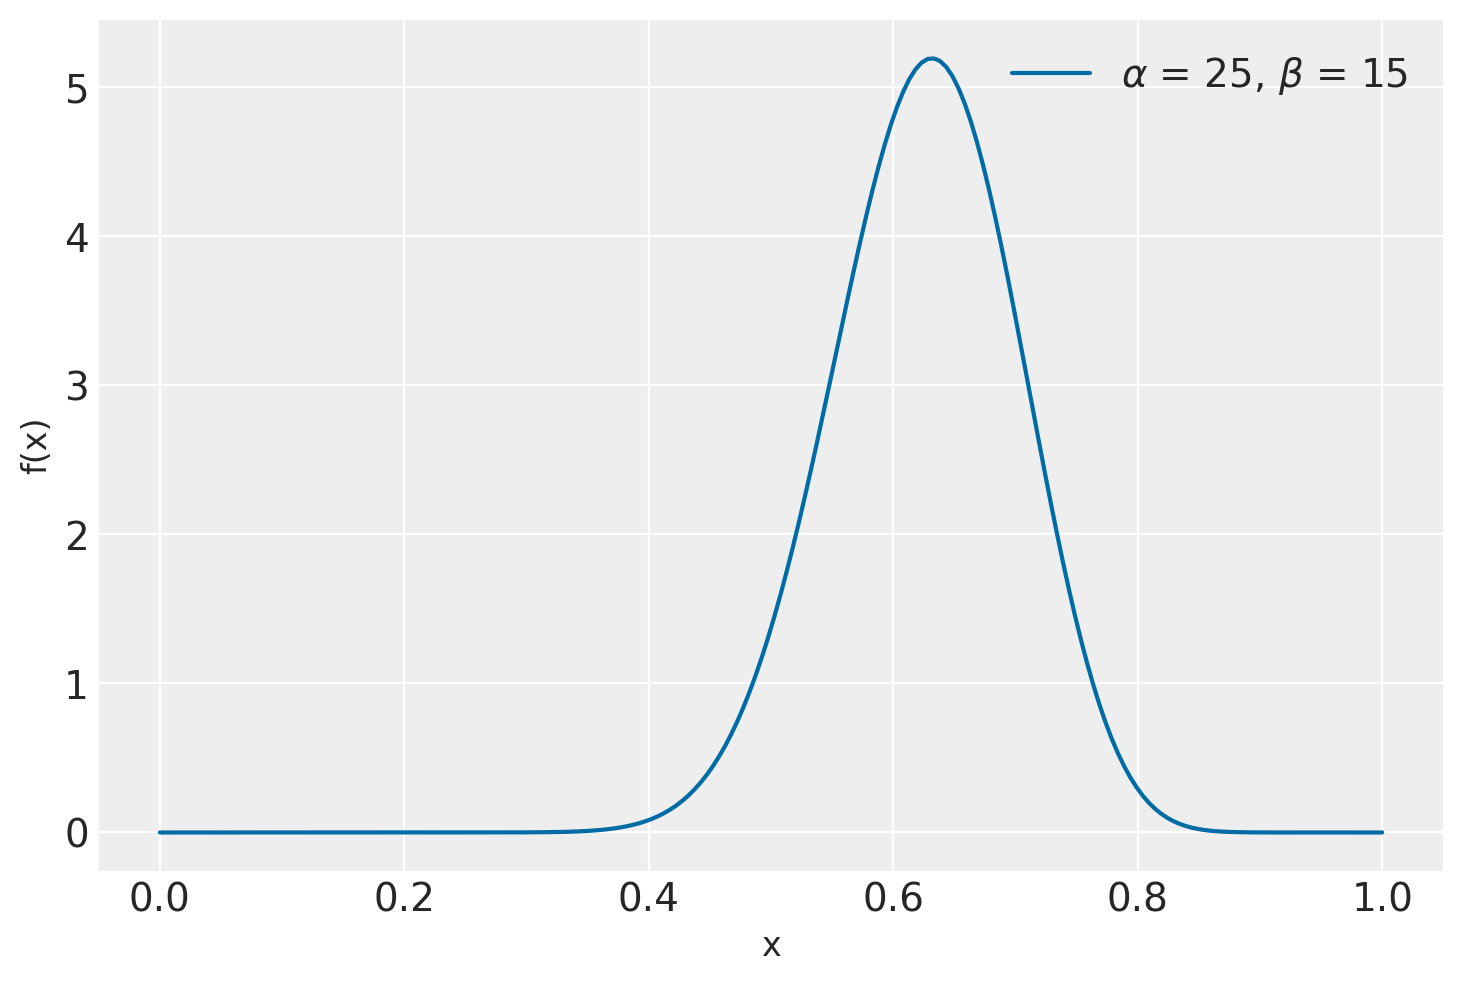

In [11]:
x = np.linspace(0, 1, 200)
a = 25
b = 15
pdf = st.beta.pdf(x, a, b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

### Stime puntuali della distribuzione a posteriori

Una volta trovata l'intera distribuzione a posteriori, quale valore di sintesi è necessario riportare? Questa sembra una domanda innocente, ma in realtà è una domanda a cui è difficile rispondere. La stima bayesiana dei parametri è fornita dall'intera distribuzione a posteriori, ovvero non da un singolo numero, ma da una funzione che mappa ciascun valore del parametro ad un valore di credibilità. Non è quindi necessario scegliere una stima puntuale: in linea di principio, una stima puntuale non è quasi mai necessaria ed è spesso dannosa in quanto comporta una perdita di informazioni.

Tuttavia, talvolta una tale sintesi è richiesta. Diverse risposte sono allora possibili. La media della distribuzione a posteriori per $\theta$ per il presente esempio è

$$
\mathbb{E}(\pi \mid y = 17) = \frac{\alpha}{\alpha + \beta} = \frac{25}{25+15} = 0.625.
$$

Una stima del massimo della probabilità a posteriori, o brevemente massimo a posteriori, MAP (da *maximum a posteriori probability*), è la moda della distribuzione a posteriori. Nel caso presente, abbiamo

$$
Mo(\pi \mid y = 17) = \frac{\alpha-1}{\alpha + \beta-2} = \frac{25-1}{25+15-2} = 0.6316.
$$

La mediana si ottiene con `.beta.ppf()`:

In [12]:
st.beta.ppf(0.5, a, b)

0.6271031100419254

### Intervallo di credibilità

È comune sintetizzare la distribuzione a posteriori mediante l'intervallo di credibilità. Per esempio, l'intervallo di credibilità a code uguali al 94% è dato dalla chiamata a `.beta.ppf()`.

In [18]:
[st.beta.ppf(0.03, a, b), st.beta.ppf(0.97, a, b)]

[0.4781025861696672, 0.7612890799836668]

Il calcolo precedente evidenzia l'interpretazione intuitiva dell'intervallo di credibilità. Tale intervallo, infatti, può essere interpretato nel modo seguente: possiamo attribuire una certezza soggettia del 94% all'evento che $\theta$ assuma un valore compreso tra 0.478 e 0.761.

Il valore di 0.94 corrisponde all'area sottesa dalla distribuzione a posteriori nell'intervallo \[0.478, 0.761\].

$$
P(\theta \in (0.478, 0.761) \mid Y = 17) = \int_{0.478}^{0.761} f(\theta \mid y=17) d\theta = 0.94.
$$

In [20]:
betacdf = st.beta(25,15).cdf
betacdf(0.7612890799836668) - betacdf(0.4781025861696672)

0.9400000000000001

Possiamo costruire diversi intervalli di credibilità a code equivalenti. Ad esempio, l'intervallo di credibilità compreso tra il 25-esimo e il 75-esimo percentile:

In [21]:
[st.beta.ppf(0.25, a, b), st.beta.ppf(0.75, a, b)]

[0.5743877928498646, 0.6778673380880944]

In questo secondo caso, possiamo dire abbiamo una certezza soggettiva a posteriori del 50% che la probabilità di depressione grave tra i pazienti clinici sia un valore compreso tra 0.57 e 0.68.

Non esiste un livello "corretto" di credibilità soggettiva. I ricercatori utilizzano livelli diversi, ad esempio il 50%, l'80% o il 95%, a seconda del contesto dell'analisi statistica. Ciascuno di questi intervalli fornisce un'immagine diversa della nostra comprensione della distribuzione a posteriori del parametro di interesse.

Non è sempre appropriato riportare l'intervallo di credibilità a code uguali. Se la distribuzione a posteriori è fortemente asimmetrica è più appropriato riportare l'intervallo di credibilità a densità a posteriori più alta (HPD). L'intervallo HPD risulta più semplice da determinare quando la distribuzione a posteriori viene approssimata con il metodo MCMC.

### Probabilità della distribuzione a posteriori

Il test di ipotesi è un compito comune dell'analisi della distribuzione a posteriori. Supponiamo che si voglia conoscere la probabilità a posteriori che $\theta$ sia superiore a 0.5. Per sapere quanto può essere ritenuto credibile l'evento $\theta > 0.5$ possiamo calcolare il seguente integrale:

$$
P(\theta > 0.5 \; \mid \; y = 17) = \int_{0.5}^{1}f(\theta \mid y=17)d\theta \;,
$$

dove $f(\cdot)$ è la distribuzione $\mbox{Beta}(25, 15)$.

In [23]:
1 - betacdf(0.5)

0.9459354892969714

#### Fattore di Bayes

È anche possibile formulare un test di ipotesi contrastando due ipotesi contrapposte. Per esempio, $H_1: \theta \geq 0.5$ e $H_2: \theta < 0.5$. Ciò consente di calcolare l'*odds a posteriori* di $\theta > 0.5$:

$$
\begin{equation}
\text{poterior odds} = \frac{H_1 \mid y = 17}{H_2 \mid y = 17}.
\end{equation}
$$

In [24]:
posterior_odds = (1 - betacdf(0.5)) / betacdf(0.5)
posterior_odds

17.496421904063965

L'odds a posteriori rappresenta l'aggiornamento delle nostre credenze dopo avere osservato $y = 17$ in $n = 30$.

Nel caso presente, l'odds a priori di $\theta > 0.5$ era pari a 50.2.

In [25]:
betacdf = st.beta(8,2).cdf

prior_odds = (1 - betacdf(0.5)) / betacdf(0.5)
prior_odds

50.2

Il *fattore di Bayes* (*Bayes Factor*; BF) confronta gli odds a posteriori con gli odds a priori e fornisce informazioni su quanto sia mutata la nostra comprensione relativa a $\theta$ dopo avere osservato i nostri dati del campione:

$$
\text{BF} = \frac{\text{odds a posteriori}}{\text{odds a priori}}.
$$

Nel caso presente otteniamo un valore di 0.35.


In [26]:
BF = posterior_odds / prior_odds
BF

0.3485343008777682

Quindi, dopo avere osservato i dati, gli odds a posteriori della nostra ipotesi a proposito di $\theta$ sono pari a solo il 34% degli odds a priori.

Per fare un altro esempio, consideriamo il caso in cui le credenze a priori rivelano una credenza diametralmente opposta rispetto a $\theta$ rispetto al caso precedente: prima avevamo $Beta(8, 2)$ mentre ora imponiamo su $\theta$ una distribuzione a priori $Beta(2, 8)$). Con una tale scelta della distribuzione a priori, la distribuzione a posteriori diventa una $Beta(19, 21)$. Con questa diversa distribuzione a priori, il BF è uguale a 30.07.

In [31]:
prior_odds = (1 - st.beta.cdf(0.5,2,8)) / st.beta.cdf(0.5,2,8)
posterior_odds = (1 - st.beta.cdf(0.5,19,21)) / st.beta.cdf(0.5,19,21)

BF = posterior_odds / prior_odds
BF

30.072390429877807

In alre parole, in questo secondo esempio gli odds a posteriori della nostra ipotesi a proposito di $\theta$ sono aumentati di 30 volte rispetto agli odds a priori.

In generale, in un test di ipotesi che contrappone un'ipotesi sostantiva $H_a$ ad un'ipotesi nulla $H_0$ il BF è un rapporto di odds per l'ipotesi sostantiva:

$$
\text{BF}
= \frac{\text{posterior odds}}{\text{prior odds}}
= \frac{P(H_a \mid Y) / P(H_0 \mid Y)}{P(H_a) / P(H_0)}
 \; .
$$

#### Interpretazione del fattore di Bayes

Essendo un rapporto, il BF deve essere valutato rispetto al valore di 1. Ci sono tre possibilità:

-   BF = 1: La credibilità di $H_a$ non è cambiata dopo avere osservato i dati.
-   BF \> 1: La credibilità di $H_a$ è aumentata dopo avere osservato i dati. Quindi maggiore è BF, più convincente risulta l'evidenza per $H_a$.
-   BF \< 1: La credibilità di $H_a$ è diminuita dopo avere osservato i dati.

Non ci sono delle soglie universalmente riconosciute per interpretare il BF, ma uno schema popolare, proposto da {cite}`lee2014bayesian`, è il seguente:

|           BF | Interpretation                 |
|-------------:|:-------------------------------|
|       \> 100 | Extreme evidence for $H_a$     |
|     30 - 100 | Very strong evidence for $H_a$ |
|      10 - 30 | Strong evidence for $H_a$      |
|       3 - 10 | Moderate evidence for $H_a$    |
|        1 - 3 | Anecdotal evidence for $H_a$   |
|            1 | No evidence                    |
|      1/3 - 1 | Anecdotal evidence for $H_0$   |
|   1/10 - 1/3 | Moderate evidence for $H_0$    |
|  1/30 - 1/10 | Strong evidence for $H_0$      |
| 1/100 - 1/30 | Very strong evidence for $H_0$ |
|     \< 1/100 | Extreme evidence for $H_0$     |

#### Limiti del fattore di Bayes

È importante notare che l'opinione maggiormente diffusa nella comunità scientifica incoraggia a *non* trarre conclusioni rigide dai dati utilizzando dei criteri fissati una volta per tutte. È stato ripetuto molte volte che *l'esame di tutta la distribuzione a posteriori* fornisce una misura olistica del nostro livello di incertezza riguardo all'affermazione (il parametro, ovvero l'ipotesi) che viene valutata e, dunque, è molto più informativo di una decisione binaria. Non è dunque possibile stabilire una soglia univoca per il BF che consenta di classificare le ipotesi dei ricercatori in una delle due categorie "vero" o "falso". Invece, è più utile adottare una pratica interpretativa più flessibile in grado di tenere in considerazione il contesto e le potenziali implicazioni di ogni singolo test di ipotesi.

La discussione precedente mette inoltre in evidenza come il BF dipenda fortemente dalle caratteristiche della distribuzione a priori. Dato che la la distribuzione a priori è una scelta arbitraria del ricercatore, da ciò consegue che il BF contiene una componente intrinseca di arbitrarietà. Questo aspetto, tuttavia, è incompatibile con l'idea di un confronto con delle soglie "assolute".

## Commenti e considerazioni finali 

Questo capitolo introduce le procedure di base per la manipolazione della distribuzione a posteriori. Lo strumento fondamentale che è stato utilizzato è quello fornito dai campioni di valori del parametro che vengono estratti dalla distribuzione a posteriori. Lavorare con campioni di valori del parametro estratti dalla distribuzione a posteriori trasforma un problema di calcolo integrale in un problema di riepilogo dei dati. Abbiamo visto le procedure maggiormente usate che consentono di utilizzare i campioni a posteriori per produrre indici di sintesi della distribuzione a posteriori: gli intervalli di credibilità e le stime puntuali.
